In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import collections
import pickle
import gc

In [2]:
df = pd.read_csv('yt_allcountry_trend5days_nostr.csv', index_col=None)

In [3]:
df

,views,likes,dislikes,comment_count,trend_over_5_days
0,17158579,787425,43420,125882,1
1,1014651,127794,1688,13030,0
2,3191434,146035,5339,8181,1
3,2095828,132239,1989,17518,1
4,33523622,1634130,21082,85067,1
...,...,...,...,...,...
178694,279728,19691,135,579,0
178695,1549110,21905,1516,1318,0
178696,2183462,79677,2034,3464,0
178697,607422,26166,895,3517,0


In [4]:
# df['trend_over_5_days'] = np.where(df["trend_days"]>5, 1, 0)

In [5]:
X = df.drop(['trend_over_5_days'],axis=1)
y = df['trend_over_5_days']

In [6]:
X

,views,likes,dislikes,comment_count
0,17158579,787425,43420,125882
1,1014651,127794,1688,13030
2,3191434,146035,5339,8181
3,2095828,132239,1989,17518
4,33523622,1634130,21082,85067
...,...,...,...,...
178694,279728,19691,135,579
178695,1549110,21905,1516,1318
178696,2183462,79677,2034,3464
178697,607422,26166,895,3517


In [7]:
y

0         1
1         0
2         1
3         1
4         1
         ..
178694    0
178695    0
178696    0
178697    0
178698    0
Name: trend_over_5_days, Length: 178699, dtype: int64

### PCA on 4 components?

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

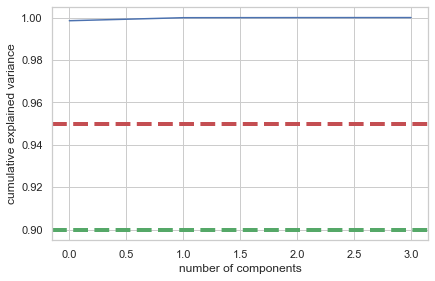

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.998518,0.998518
1,0.999936,0.001419
2,0.999983,0.000047
3,1.000000,0.000017


In [9]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
plt.axhline(linewidth=4, color='r', linestyle = '--', y=0.95, xmin=0, xmax=1)
plt.axhline(linewidth=4, color='g', linestyle = '--', y=0.90, xmin=0, xmax=1)

display(plt.show())

evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

### 1 component can explain 99.85% of the explained variance!?

In [10]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

In [11]:
pca.explained_variance_ratio_

array([0.9985179])

In [12]:
X_pca

array([[16985326.77388195],
       [  828082.1382451 ],
       [ 3004261.0713215 ],
       ...,
       [ 1994642.689757  ],
       [  417710.17138338],
       [  106151.26246091]])

In [15]:
df_pca = pd.DataFrame(X_pca, columns = ['PCA_1'])
df_pca

,PCA_1
0,1.698533e+07
1,8.280821e+05
2,3.004261e+06
3,1.908834e+06
4,3.336893e+07
...,...
178694,8.996948e+04
178695,1.358737e+06
178696,1.994643e+06
178697,4.177102e+05


## X use subsets

total n = 178699

1. n = 10000
2. n = 50000
3. n = 100000

## Then Test Train split

In [16]:
X_10k = df_pca[:10000]
X_50k = df_pca[:50000]
X_100k = df_pca[:100000]

y_10k = y[:10000]
y_50k = y[:50000]
y_100k = y[:100000]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.25, random_state=42)
X_train_10k, X_test_10k, y_train_10k, y_test_10k = train_test_split(X_10k, y_10k, test_size=0.25, random_state=42)
X_train_50k, X_test_50k, y_train_50k, y_test_50k = train_test_split(X_50k, y_50k, test_size=0.25, random_state=42)
X_train_100k, X_test_100k, y_train_100k, y_test_100k = train_test_split(X_100k, y_100k, test_size=0.25, random_state=42)

In [18]:
X_train

,PCA_1
113617,-63399.010629
65534,-175598.583473
126111,-180685.211222
8740,-158117.975051
57496,-178476.489175
...,...
119879,-182259.700562
103694,-112031.366070
131932,-92028.654403
146867,-173672.747425


In [19]:
X_test

,PCA_1
117989,-187657.964487
101258,-159238.430382
44861,-150972.096325
5811,-112381.721917
63847,-53498.503298
...,...
131037,-181979.183894
112353,97086.233290
75019,-112185.066005
93855,-101514.186902


### Classifier 1: Naive Bayes - Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

In [21]:
%%time
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GNB_predicted = GNB.predict(X_test)
GNB_precision = precision_score(y_test, GNB_predicted)
GNB_recall = recall_score(y_test, GNB_predicted)
GNB_f1 = f1_score(y_test, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test, y_test)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.9641857862339116
Precision Score: 0.27702702702702703
Recall Score: 0.12275449101796407
F1 Score: 0.17012448132780084
Wall time: 28.5 ms


In [22]:
%%time
GNB = GaussianNB()
GNB.fit(X_train_10k, y_train_10k)

GNB_predicted = GNB.predict(X_test_10k)
GNB_precision = precision_score(y_test_10k, GNB_predicted)
GNB_recall = recall_score(y_test_10k, GNB_predicted)
GNB_f1 = f1_score(y_test_10k, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.9004
Precision Score: 0.375
Recall Score: 0.13100436681222707
F1 Score: 0.19417475728155342
Wall time: 4.5 ms


In [23]:
%%time
GNB = GaussianNB()
GNB.fit(X_train_50k, y_train_50k)

GNB_predicted = GNB.predict(X_test_50k)
GNB_precision = precision_score(y_test_50k, GNB_predicted)
GNB_recall = recall_score(y_test_50k, GNB_predicted)
GNB_f1 = f1_score(y_test_50k, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.94784
Precision Score: 0.3411764705882353
Recall Score: 0.15236427320490367
F1 Score: 0.2106537530266344
Wall time: 9.01 ms


In [24]:
%%time
GNB = GaussianNB()
GNB.fit(X_train_100k, y_train_100k)

GNB_predicted = GNB.predict(X_test_100k)
GNB_precision = precision_score(y_test_100k, GNB_predicted)
GNB_recall = recall_score(y_test_100k, GNB_predicted)
GNB_f1 = f1_score(y_test_100k, GNB_predicted)

print(f'Accuracy Score: {GNB.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

Accuracy Score: 0.95332
Precision Score: 0.34415584415584416
Recall Score: 0.15542521994134897
F1 Score: 0.21414141414141413
Wall time: 15.5 ms


In [25]:
%%time
from sklearn.model_selection import cross_val_score

GNB_cvs = cross_val_score(GNB, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(f"GaussianNB 10-CV score: {GNB_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(GNB_cvs)}")

GaussianNB 10-CV score: [0.92126469 0.95422496 0.96552882 0.97437045 0.9616676  0.96614438
 0.96205932 0.96149972 0.95148293 0.95327103]
GaussianNB 10-fold Cross Val Avg: 0.9571513893174485
Wall time: 1.08 s


In [26]:
print(len(GNB.predict_proba(X_test)))
GNB_probs = GNB.predict_proba(X_test)
GNB_probs
# print(min(GNB_probs[0])

44675


array([[0.99181647, 0.00818353],
       [0.99194361, 0.00805639],
       [0.99197584, 0.00802416],
       ...,
       [0.99209938, 0.00790062],
       [0.99212555, 0.00787445],
       [0.99181968, 0.00818032]])

In [27]:
GNB_probs[:,0]

array([0.99181647, 0.99194361, 0.99197584, ..., 0.99209938, 0.99212555,
       0.99181968])

In [28]:
GNB_probs[:,1]

array([0.00818353, 0.00805639, 0.00802416, ..., 0.00790062, 0.00787445,
       0.00818032])

In [29]:
print(f"min of left col = {min(GNB_probs[:,0])}, max of right col = {max(GNB_probs[:,1])}")
print(f"max of left col = {max(GNB_probs[:,0])}, min of right col = {min(GNB_probs[:,1])}")

min of left col = 0.0, max of right col = 1.0
max of left col = 0.9922177963745802, min of right col = 0.007782203625420052


In [30]:
len(GNB_probs[:,0])

44675

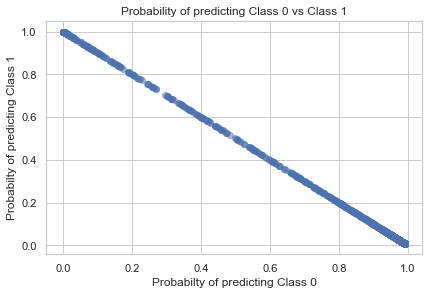

In [31]:
fig, ax = plt.subplots()
plt.scatter(GNB_probs[:,0], GNB_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 1')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [32]:
for i, val in enumerate(GNB_probs[:,0]):
    if i < 10:
        print(i, val)

0 0.9918164672215359
1 0.9919436146429494
2 0.9919758406763656
3 0.9920988696036286
4 0.992202671072064
5 0.9920143962503237
6 0.9921824034524014
7 0.9920127591688659
8 0.9922079124683401
9 0.9920993779422592


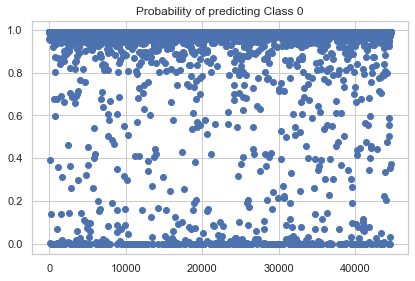

In [33]:
xrange = [i for i in range(len(GNB_probs[:,0]))]
plt.scatter(xrange, GNB_probs[:,0])
plt.title('Probability of predicting Class 0')

plt.show()

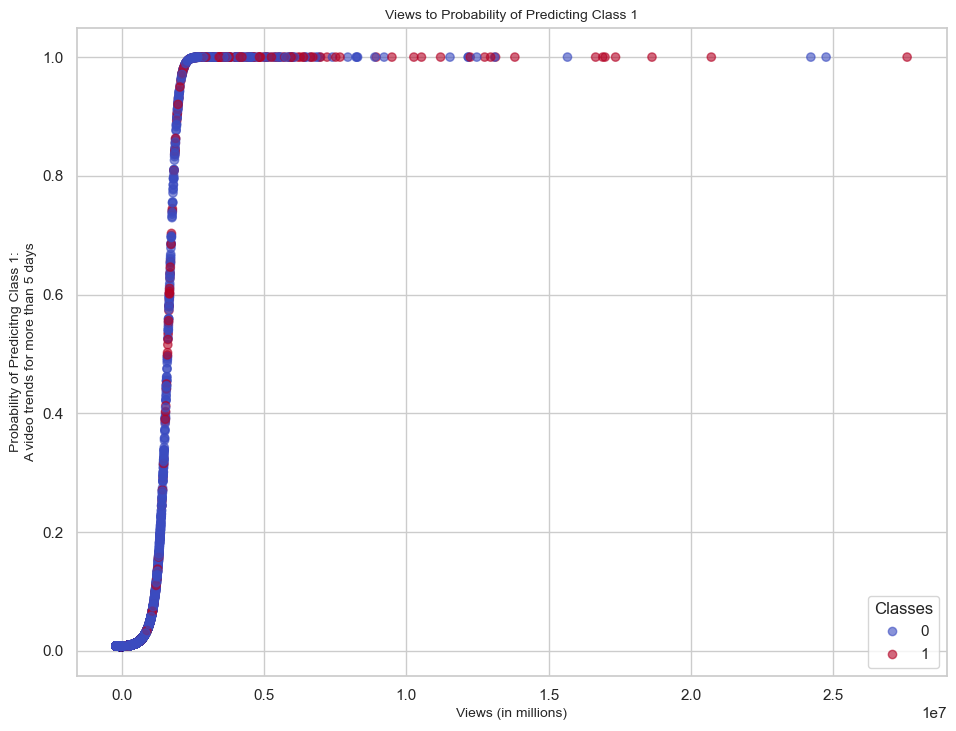

In [36]:
plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['PCA_1'], GNB_probs[:,1], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Views to Probability of Predicting Class 1', fontsize='small')
plt.xlabel('Views (in millions)', fontsize='small')
plt.ylabel('Probability of Predicitng Class 1:\nA video trends for more than 5 days', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='lower right', title='Classes')
# ax.legend()

plt.show()

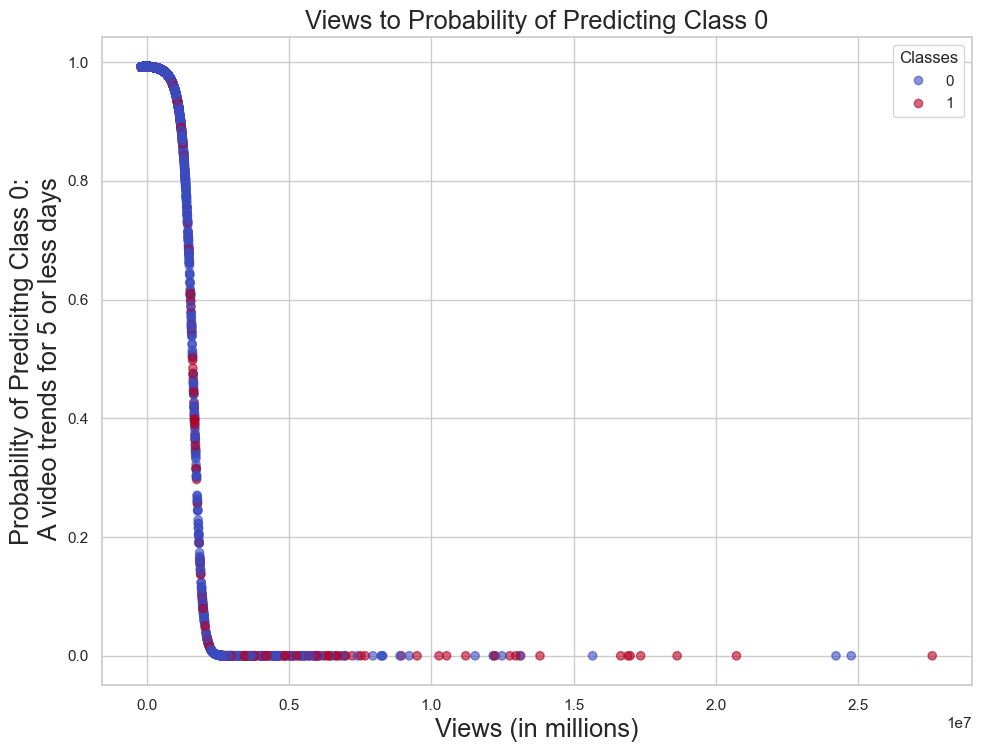

In [37]:
plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['PCA_1'], GNB_probs[:,0], 
                        c=y_test, 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Views to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Views (in millions)', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0:\n A video trends for 5 or less days', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

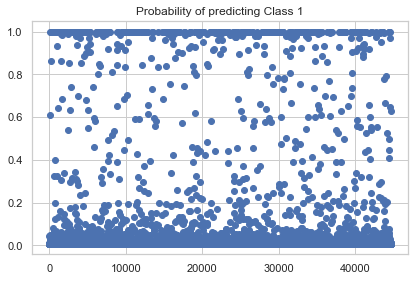

In [39]:
# xrange = [i for i in range(len(GNB_probs[:,0]))]
plt.scatter(xrange, GNB_probs[:,1])
plt.title('Probability of predicting Class 1')

plt.show()

## Histogram to show quantity of predictions to probability

In [40]:
from numpy import arange
bins = [i for i in arange(0.0, 1.0, 0.1)]
bins 

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [41]:
import numpy as np

In [42]:
bins = np.linspace(0.0,1.0, num=11)
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

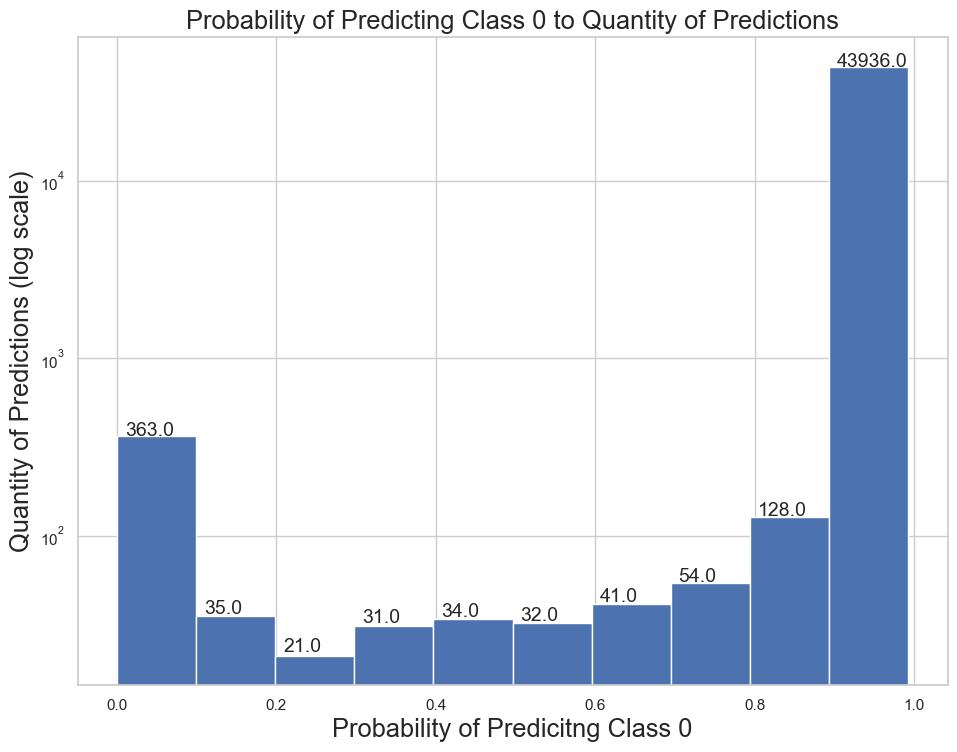

In [44]:
bins2 = 10

plt.figure(figsize=(10, 8), dpi=100)

arr = plt.hist(GNB_probs[:,0], bins2,
#                c=,
              )

# plt.ylim(0,1000)
plt.yscale('log')
plt.title('Probability of Predicting Class 0 to Quantity of Predictions',fontsize='small')
plt.xlabel('Probability of Predicitng Class 0', fontsize='small')
plt.ylabel('Quantity of Predictions (log scale)', fontsize='small')
plt.rcParams.update({'font.size': 22})

for i in range(bins2):
    plt.text(arr[1][i]+0.01,
             arr[0][i]+1,
             str(arr[0][i]), 
             fontsize=14, 
            )
    plt.text(arr[1][i],
             arr[0][i]/1.5,
             str(), 
             fontsize=14, 
            )


plt.show()

In [45]:
arr

(array([3.6300e+02, 3.5000e+01, 2.1000e+01, 3.1000e+01, 3.4000e+01,
        3.2000e+01, 4.1000e+01, 5.4000e+01, 1.2800e+02, 4.3936e+04]),
 array([0.        , 0.09922178, 0.19844356, 0.29766534, 0.39688712,
        0.4961089 , 0.59533068, 0.69455246, 0.79377424, 0.89299602,
        0.9922178 ]),
 <BarContainer object of 10 artists>)

## Calibration Curves

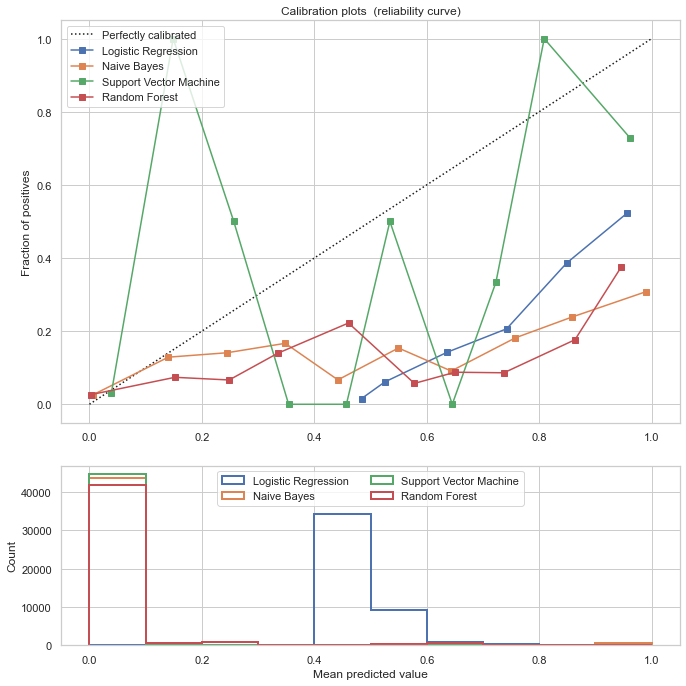

Wall time: 59.8 s


In [47]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic Regression'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Machine'),
                  (rfc, 'Random Forest')]:
    
#     Already trained
    clf.fit(X_train, y_train)

    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="upper left")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [ ]:
count = 0
for val in GNB_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(GNB_probs[:,1])}")

In [ ]:
# fig, ax = plt.subplots()

# x_val=len(GNB_probs)

# ax.bar(x_val, GNB_probs[:,0])


# ax.set_ylabel('Probability')
# ax.set_title('Probability of x_i being in class 0')
# plt.show()

In [ ]:
count = 0
for val in GNB_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

In [ ]:
 GNB.predict(X_test)

In [ ]:
GNB_predicted = GNB.predict(X_test)
GNB_precision = precision_score(y_test, GNB_predicted)
GNB_recall = recall_score(y_test, GNB_predicted)
GNB_f1 = f1_score(y_test, GNB_predicted)

print(f'Precision Score: {GNB_precision}')
print(f'Recall Score: {GNB_recall}')
print(f'F1 Score: {GNB_f1}')

### Classifier 2: Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
# %%time
# from sklearn.model_selection import cross_val_score

# clf_log_cvs = cross_val_score(clf_log, X, y, 
#                               cv=10, 
#                               n_jobs=-1,)

# print(f"GaussianNB 10-CV score: {clf_log_cvs}")
# print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(clf_log_cvs)}")

In [50]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train,y_train)

print(f'Accuracy Score:  {clf_log.score(X_test,y_test)}')

clf_log_predicted = clf_log.predict(X_test)
clf_log_precision = precision_score(y_test, clf_log_predicted)
clf_log_recall = recall_score(y_test, clf_log_predicted)
clf_log_f1 = f1_score(y_test, clf_log_predicted)

print(f'Predicted Array: {clf_log_predicted}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score: {clf_log_recall}')
print(f'F1 Score: {clf_log_f1}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Accuracy Score:  0.7732512590934527
Predicted Array: [0 0 0 ... 0 0 0]
Precision Score: 0.07713021734949028
Recall Score: 0.6002994011976048
F1 Score: 0.13669677859212545
Wall time: 518 ms


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


In [51]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train_10k,y_train_10k)

clf_log_predicted = GNB.predict(X_test_10k)
clf_log_precision = precision_score(y_test_10k, clf_log_predicted)
clf_log_recall = recall_score(y_test_10k, clf_log_predicted)
clf_log_f1 = f1_score(y_test_10k, clf_log_predicted)

print(f'Accuracy Score:  {clf_log.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score:    {clf_log_recall}')
print(f'F1 Score:        {clf_log_f1}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Accuracy Score:  0.4696
Precision Score: 0.325
Recall Score:    0.1703056768558952
F1 Score:        0.22349570200573068
Wall time: 301 ms


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [52]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train_50k,y_train_50k)

clf_log_predicted = GNB.predict(X_test_50k)
clf_log_precision = precision_score(y_test_50k, clf_log_predicted)
clf_log_recall = recall_score(y_test_50k, clf_log_predicted)
clf_log_f1 = f1_score(y_test_50k, clf_log_predicted)

print(f'Accuracy Score:  {clf_log.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score:    {clf_log_recall}')
print(f'F1 Score:        {clf_log_f1}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Accuracy Score:  0.34696
Precision Score: 0.3166144200626959
Recall Score:    0.17688266199649738
F1 Score:        0.22696629213483147
Wall time: 318 ms


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [53]:
%%time
clf_log = LogisticRegression(random_state=42,
                            verbose=2,
                            n_jobs=-1,)
clf_log.fit(X_train_100k,y_train_100k)

clf_log_predicted = GNB.predict(X_test_100k)
clf_log_precision = precision_score(y_test_100k, clf_log_predicted)
clf_log_recall = recall_score(y_test_100k, clf_log_predicted)
clf_log_f1 = f1_score(y_test_100k, clf_log_predicted)

print(f'Accuracy Score:  {clf_log.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {clf_log_precision}')
print(f'Recall Score:    {clf_log_recall}')
print(f'F1 Score:        {clf_log_f1}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Accuracy Score:  0.72604
Precision Score: 0.34415584415584416
Recall Score:    0.15542521994134897
F1 Score:        0.21414141414141413
Wall time: 348 ms


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [ ]:
log_probs = clf_log.predict_proba(X_test)

In [ ]:
print(f"min of left col = {min(log_probs[:,0])}, max of right col = {max(log_probs[:,1])}")
print(f"max of left col = {max(log_probs[:,0])}, min of right col = {min(log_probs[:,1])}")

In [ ]:
fig, ax = plt.subplots()
plt.scatter(log_probs[:,0], log_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [ ]:
count = 0
for val in log_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")

In [ ]:
count = 0
for val in log_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(log_probs[:,1])}")

### Classifier 3: Support Vector Machine (SVC)

In [60]:
from sklearn.svm import SVC, LinearSVC

In [61]:
# %%time
# clf_svm_rbf_cvs = cross_val_score(clf_svm_rbf, X, y, 
#                               cv=10, 
#                               n_jobs=-1,)

# print(f"GaussianNB 10-CV score: {clf_svm_rbf_cvs}")
# print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(clf_svm_rbf_cvs)}")

In [62]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train,y_train)

clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test)
clf_svm_rbf_precision = precision_score(y_test, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test, clf_svm_rbf_predicted)

print(f'Accuracy Score:  {clf_svm_rbf.score(X_test,y_test)}')
print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

[LibSVM]Accuracy Score:  0.9701622831561276
Precision Score: 0.5714285714285714
Recall Score: 0.008982035928143712
F1 Score: 0.01768607221812822
Wall time: 2min 40s


In [63]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train_10k, y_train_10k)

clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test_10k)
clf_svm_rbf_precision = precision_score(y_test_10k, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test_10k, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test_10k, clf_svm_rbf_predicted)

print(f'Accuracy Score:  {clf_svm_rbf.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

[LibSVM]Accuracy Score:  0.9084
Precision Score: 0.5
Recall Score: 0.043668122270742356
F1 Score: 0.08032128514056225
Wall time: 1.74 s


In [64]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train_50k, y_train_50k)

clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test_50k)
clf_svm_rbf_precision = precision_score(y_test_50k, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test_50k, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test_50k, clf_svm_rbf_predicted)

print(f'Accuracy Score:  {clf_svm_rbf.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

[LibSVM]Accuracy Score:  0.95464
Precision Score: 0.5714285714285714
Recall Score: 0.028021015761821366
F1 Score: 0.05342237061769616
Wall time: 12.5 s


In [65]:
%%time
clf_svm_rbf = SVC(probability=True,
                  kernel='rbf',
                  verbose=2,
                  random_state=42,)

clf_svm_rbf.fit(X_train_100k, y_train_100k)

clf_svm_rbf_predicted = clf_svm_rbf.predict(X_test_100k)
clf_svm_rbf_precision = precision_score(y_test_100k, clf_svm_rbf_predicted)
clf_svm_rbf_recall = recall_score(y_test_100k, clf_svm_rbf_predicted)
clf_svm_rbf_f1 = f1_score(y_test_100k, clf_svm_rbf_predicted)

print(f'Accuracy Score:  {clf_svm_rbf.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {clf_svm_rbf_precision}')
print(f'Recall Score: {clf_svm_rbf_recall}')
print(f'F1 Score: {clf_svm_rbf_f1}')

[LibSVM]Accuracy Score:  0.9594
Precision Score: 0.5625
Recall Score: 0.03519061583577713
F1 Score: 0.06623735050597977
Wall time: 48.9 s


In [ ]:
svm_rbf_probs = GNB.predict_proba(X_test)

In [ ]:
print(f"min of left col = {min(svm_rbf_probs[:,0])}, max of right col = {max(svm_rbf_probs[:,1])}")
print(f"max of left col = {max(svm_rbf_probs[:,0])}, min of right col = {min(svm_rbf_probs[:,1])}")

In [ ]:
fig, ax = plt.subplots()
plt.scatter(svm_rbf_probs[:,0], svm_rbf_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [ ]:
count = 0
for val in svm_rbf_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")
print(f"% of val around 0.5 = {count/len(svm_rbf_probs[:,1])}")

In [ ]:
count = 0
for val in svm_rbf_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(svm_rbf_probs[:,1])}")

### LinearSVC

In [ ]:
%%time
from sklearn.svm import LinearSVC

clf_svm_lin = LinearSVC(
#                         probability=True,
                         verbose=2,
                         random_state=42,)

clf_svm_lin.fit(X_train,y_train)

In [ ]:
%%time
clf_svm_lin.score(X_test,y_test)

%%time
from sklearn.model_selection import cross_val_score

clf_svm_lin_cvs = cross_val_score(clf_svm_lin, X, y, 
                              cv=10, 
                              n_jobs=-1,)

print(f"GaussianNB 10-CV score: {clf_svm_lin_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(clf_svm_lin_cvs)}")

In [ ]:
svm_lin_probs = GNB.predict_proba(X_test)

In [ ]:
print(f"min of left col = {min(svm_lin_probs[:,0])}, max of right col = {max(svm_lin_probs[:,1])}")
print(f"max of left col = {max(svm_lin_probs[:,0])}, min of right col = {min(svm_lin_probs[:,1])}")

In [ ]:
fig, ax = plt.subplots()
plt.scatter(svm_lin_probs[:,0], svm_lin_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [ ]:
count = 0
for val in svm_lin_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")
print(f"% of val around 0.5 = {count/len(svm_lin_probs[:,1])}")

In [ ]:
count = 0
for val in svm_lin_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(svm_lin_probs[:,1])}")

### Classifier 4: Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )

clf_rdf.fit(X_train,y_train)

clf_rdf_predicted = clf_rdf.predict(X_test)
clf_rdf_precision = precision_score(y_test, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test,y_test)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.9472859541130386
Precision Score: 0.09402390438247012
Recall Score: 0.08832335329341318
F1 Score: 0.0910845233500579
Wall time: 1.82 s


In [57]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )
clf_rdf.fit(X_train_10k,y_train_10k)

clf_rdf_predicted = clf_rdf.predict(X_test_10k)
clf_rdf_precision = precision_score(y_test_10k, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test_10k, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test_10k, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test_10k, y_test_10k)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.8468
Precision Score: 0.16228070175438597
Recall Score: 0.1615720524017467
F1 Score: 0.16192560175054704
Wall time: 355 ms


In [58]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )
clf_rdf.fit(X_train_50k,y_train_50k)

clf_rdf_predicted = clf_rdf.predict(X_test_50k)
clf_rdf_precision = precision_score(y_test_50k, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test_50k, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test_50k, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test_50k, y_test_50k)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.92272
Precision Score: 0.1635434412265758
Recall Score: 0.1681260945709282
F1 Score: 0.16580310880829013
Wall time: 588 ms


In [59]:
%%time
clf_rdf = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
#                        verbose=2,
                                )
clf_rdf.fit(X_train_100k,y_train_100k)

clf_rdf_predicted = clf_rdf.predict(X_test_100k)
clf_rdf_precision = precision_score(y_test_100k, clf_rdf_predicted)
clf_rdf_recall = recall_score(y_test_100k, clf_rdf_predicted)
clf_rdf_f1 = f1_score(y_test_100k, clf_rdf_predicted)

print(f'Accuracy Score:  {clf_rdf.score(X_test_100k, y_test_100k)}')
print(f'Precision Score: {clf_rdf_precision}')
print(f'Recall Score: {clf_rdf_recall}')
print(f'F1 Score: {clf_rdf_f1}')

Accuracy Score:  0.92924
Precision Score: 0.13715953307392997
Recall Score: 0.1378299120234604
F1 Score: 0.13749390541199416
Wall time: 1.04 s


In [ ]:
rdf_probs = GNB.predict_proba(X_test)

In [ ]:
print(f"min of left col = {min(rdf_probs[:,0])}, max of right col = {max(rdf_probs[:,1])}")
print(f"max of left col = {max(rdf_probs[:,0])}, min of right col = {min(rdf_probs[:,1])}")

In [ ]:
fig, ax = plt.subplots()
plt.scatter(rdf_probs[:,0], rdf_probs[:,1], alpha=0.5)

plt.title('Probability of predicting Class 0 vs Class 0')
ax.set_xlabel('Probabilty of predicting Class 0')
ax.set_ylabel('Probabilty of predicting Class 1')

plt.show()

In [ ]:
count = 0
for val in rdf_probs[:,0]:
    if 0.8 > val > 0.2:
        count += 1
        print(val)

print(f"# of val around 0.5 = {count}")
print(f"% of val around 0.5 = {count/len(rdf_probs[:,1])}")

In [ ]:
count = 0
for val in rdf_probs[:,1]:
    if val >= 0.9:
        count += 1
        print(val)

print(f"# of val above 0.9 = {count}")
print(f"% of val above 0.9 = {count/len(rdf_probs[:,1])}")

## Reappending the prediction probabilites after Gaussian NB back on X_test, to observe some behavior

1. Add predicts back on to new dataframe with X_test
2. use clf to parse for feature importance

In [ ]:
X_test_probs = X_test.copy()

GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_predicted = GNB.predict(X_test)

X_test_probs['prob_0'] = GNB_probs[:,0]
X_test_probs['prob_1'] = GNB_probs[:,1]
X_test_probs['predict_class'] = GNB.predict(X_test)
X_test_probs['label'] = y_test
X_test_probs

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test_probs['views'], GNB_probs[:,0], 
                        c=X_test_probs['predict_class'], 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Views to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Views (in millions)', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Predicted Classes')
# ax.legend()

plt.show()

In [ ]:
xrange = [i for i in range(len(GNB_probs[:,0]))]

plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_test['comment_count'], GNB_probs[:,0], 
                        c=X_test_probs['predict_class'], 
                        cmap='coolwarm',
                        alpha=0.6)
plt.title('Comment Count to Probability of Predicting Class 0', fontsize='small')
plt.xlabel('Comment Count', fontsize='small')
plt.ylabel('Probability of Predicitng Class 0', fontsize='small')
plt.rcParams.update({'font.size': 22})


plt.legend(*scatter.legend_elements(), loc='upper right', title='Classes')
# ax.legend()

plt.show()

In [ ]:
GNB.feature_log_prob_

In [ ]:
X_test_probs

In [ ]:
# to first affirm that prob_0 and prob_1 were truly labeled as what they were supposed to be

count = 0
for i, row in X_test_probs.iterrows():
    count += 1
    if count > 5:
        break
    print(f'i:{i}, V:{row.views}, L:{row.likes}, D:{row.dislikes}, C:{row.comment_count}')
    print(f'i:{i}, Prob_0:{row.prob_0}, Prob_1:{row.prob_1}, Label:{row.label}\n')

In [ ]:
count = 0
for i, row in X_caltest_probs.iterrows():
    if 0.65 > row.prob_0 > 0.45:
        count += 1
        print(f'i:{i}, V:{row.views}, L:{row.likes}, D:{row.dislikes}, C:{row.comment_count}')
        print(f'i:{i}, Prob_0:{row.prob_0}, Prob_1:{row.prob_1}, Label:{row.label}\n')
        
print(f'\nCount = {count}')

### Other observations

In [ ]:
len(X_test)

In [ ]:
np.array(X_test[19:20])

In [ ]:
y_test[19:20]

In [ ]:
GNB.predict_proba(X_test[:-1])

In [ ]:
GNB.predict(X_test[5::-1])

In [ ]:
# custom 
print(GNB.predict(np.array([[17158579, 787425, 43420, 125882]])))
print(GNB.predict_proba(np.array([[17158579, 787425, 43420, 125882]])))

In [ ]:
# custom 
arr2 = [4567, 787, 430, 125]
print(GNB.predict(np.array([arr2])))
print(GNB.predict_proba(np.array([arr2])))

### Using only views, comments, and likes to graph 3D

In [ ]:
X3 = X.drop(['dislikes'],axis=1)
X3

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.25, random_state=42)

In [ ]:
X3_train

In [ ]:
y3_train

### Gaussian Naive Bayes on views, comments, likes, only

In [ ]:
GNB_3 = GaussianNB()
GNB_3.fit(X3_train, y3_train)

In [ ]:
GNB_3.score(X3_test, y3_test)

In [ ]:
from sklearn.model_selection import cross_val_score

GNB_3_cvs = cross_val_score(GNB_3, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(GNB_3_cvs)
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(GNB_3_cvs)}")

### Bernoulli Naive Bayes on 4 stats, then the 3 stats

In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

In [ ]:
BNB.score(X_test, y_test)

In [ ]:
BNB_cvs = cross_val_score(BNB, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(f"GaussianNB 10-CV score: {BNB_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(BNB_cvs)}")

In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X3_train, y_train)

In [ ]:
BNB.score(X3_test, y_test)

In [ ]:
BNB_cvs = cross_val_score(BNB, X, y, 
                          cv=10, 
                          n_jobs=-1,)

print(f"GaussianNB 10-CV score: {BNB_cvs}")
print(f"GaussianNB 10-fold Cross Val Avg: {np.mean(BNB_cvs)}")

### Random Forest Classifier on 4 stats, looking at feature importance

In [ ]:
%%time 
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

In [ ]:
%%time
rf_clf.score(X_test,y_test)

## Taking a look at feature importance from Random Forest

In [ ]:
# quick investigation into the correlation of features to the label
df_nostr.corr()["trend_over_5_days"].sort_values(ascending=False)

In [ ]:
rf_clf.feature_importances_

In [ ]:
plt.barh(X.columns, rf_clf.feature_importances_)

In [ ]:
%%time
import shap

explainer = shap.TreeExplainer(rf_clf)

In [ ]:
%%time
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shape_values, X_test, plot_type="bar")

In [ ]:
shap.summary_plot(shape_values, X_train)

In [ ]:
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# y = np.array([1, 1, 2, 2])
# from sklearn.svm import SVC
# clf = SVC(probability=True)
# clf.fit(X, y) 
# print(clf.predict([[-0.8, -1]]))
# print(clf.predict_proba([[-0.8, -1]]))

### Heat Map remade with Spearman's rank correlation 

In [ ]:
import seaborn as sns

sns.heatmap(df_nostr.corr(method='spearman'),annot=True,cmap='coolwarm')

In [ ]:
sns.heatmap(df_nostr.corr(method='pearson'),annot=True,cmap='coolwarm_r')

In [ ]:
df_nostr.corr(method='pearson')['trend_over_5_days']